In [42]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load Dataset and check shape of data
Data1 = pd.read_csv("/kaggle/input/aml-assignment1datasets/Dataset_1/Dataset_1.csv")
Data1.shape

(5000, 27)

In [3]:
# Print Dataset
Data1.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


# Data Preprocessing

## Data Cleaning
- Ditributions
- Target variable balance check
- Handling structural errors (Typo, incorrect formatting, ... e.t.c.)
- Handling Null values
- Handling duplicates
- Handling Outliers

(array([2471.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2529.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

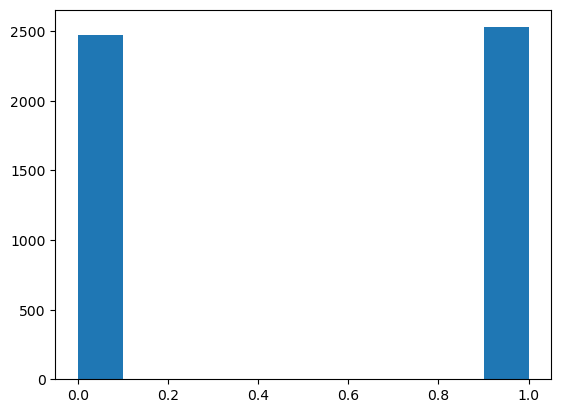

In [4]:
# Target variable distribution
plt.hist(Data1.Diagnosis)

In [5]:
# Handling Structural errors
Data1.dtypes

Diagnosis               int64
Anhedonia             float64
Apathy                float64
Appetite              float64
Concentration         float64
Content               float64
Delay                  object
Delusion              float64
Dep_Mood              float64
Focus                 float64
Hallucination         float64
Housing                object
Intrusive_Thoughts    float64
Participant             int64
Passive               float64
Pregnant              float64
Psychomotor           float64
Race                   object
Rumination            float64
Sex                    object
Sleep                 float64
Stress                float64
Suspicious            float64
Tension               float64
Tired                 float64
Unusual_Thought       float64
Withdrawal            float64
dtype: object

In [6]:
Data1.dtypes.value_counts()

float64    21
object      4
int64       2
dtype: int64

In [7]:
Data1.Race.unique()

array(['White', 'Black', 'Asian', 'Hispanic'], dtype=object)

<AxesSubplot:>

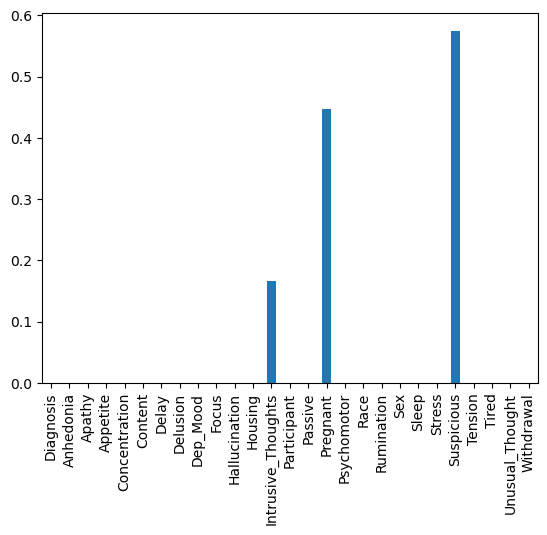

In [8]:
# Handling Null values
Data1.isnull().mean().plot.bar()

In [9]:
# Remove complete null columns
Data1.drop(Data1.columns[[15,22]], axis=1, inplace=True)

In [10]:
Data1.isnull().mean()

Diagnosis             0.000
Anhedonia             0.000
Apathy                0.000
Appetite              0.000
Concentration         0.000
Content               0.000
Delay                 0.000
Delusion              0.000
Dep_Mood              0.000
Focus                 0.000
Hallucination         0.000
Housing               0.000
Intrusive_Thoughts    0.166
Participant           0.000
Passive               0.000
Psychomotor           0.000
Race                  0.000
Rumination            0.000
Sex                   0.000
Sleep                 0.000
Stress                0.000
Tension               0.000
Tired                 0.000
Unusual_Thought       0.000
Withdrawal            0.000
dtype: float64

In [11]:
# Fill remaining Null values with Mean
IT_mean = Data1.Intrusive_Thoughts.mean()
Data1.fillna(IT_mean, inplace = True)
Data1.isnull().mean()

Diagnosis             0.0
Anhedonia             0.0
Apathy                0.0
Appetite              0.0
Concentration         0.0
Content               0.0
Delay                 0.0
Delusion              0.0
Dep_Mood              0.0
Focus                 0.0
Hallucination         0.0
Housing               0.0
Intrusive_Thoughts    0.0
Participant           0.0
Passive               0.0
Psychomotor           0.0
Race                  0.0
Rumination            0.0
Sex                   0.0
Sleep                 0.0
Stress                0.0
Tension               0.0
Tired                 0.0
Unusual_Thought       0.0
Withdrawal            0.0
dtype: float64

In [12]:
# Handling duplicates
#Data3.duplicated().sum()
Data1.duplicated().value_counts()

False    5000
dtype: int64

## Label Encoding

In [13]:
# converting ordinal data to numeric
LE = LabelEncoder()
Data1['Delay'] = LE.fit_transform(Data1['Delay'].astype('str'))
Data1['Sex'] = LE.fit_transform(Data1['Sex'].astype('str'))
Data1['Race'] = LE.fit_transform(Data1['Race'].astype('str'))
Data1['Housing'] = LE.fit_transform(Data1['Housing'].astype('str'))

In [14]:
Data1.dtypes.value_counts()

float64    19
int64       6
dtype: int64

In [15]:
# Handling outliers
Data1.shape
#Data3.dtypes.value_counts()
#Data3.head()

(5000, 25)

In [16]:
#Data1[(np.abs(stats.zscore(Data1)) < 3).all(axis=1)]

In [17]:
Data1.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,1,1.170842,8.177884,8.305502,...,3.854579,3,5.041432,0,6.552082,5.915492,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,1,2.272548,11.162913,5.060206,...,5.821110,3,4.656790,1,5.558434,4.008265,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,0,1.439095,5.887363,6.504229,...,7.893102,1,7.290494,0,5.787561,7.177926,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,0,1.380185,8.943851,6.994948,...,3.812874,3,6.759339,0,6.787287,2.866815,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,1,1.237976,6.741627,5.869212,...,5.119658,1,6.190019,1,7.748312,6.798220,5.063542,4.213723,0.705895,6.547707


In [18]:
Data1.Diagnosis.unique()

array([1, 0])

## Data Transformation
- Handling categorical data
- Feature Scaling (Normalization or Standardization)

In [19]:
Data1.dtypes.value_counts()

float64    19
int64       6
dtype: int64

In [20]:
# Normalization
Mean_normalized_Data1 = (Data1-Data1.min())/(Data1.max() - Data1.min())

In [21]:
# Standardization
Zscore_normalized_Data1 = (Data1-Data1.mean())/Data1.std()

In [22]:
Mean_normalized_Data1.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Tension,Tired,Unusual_Thought,Withdrawal
0,1.0,0.323924,0.521671,0.080697,0.676884,0.000284,1.0,0.296951,0.681289,0.676884,...,0.380478,1.000000,0.438892,0.0,0.450853,0.602366,0.724688,0.0,0.569829,0.616233
1,0.0,0.412570,0.292875,0.226557,0.363319,0.002953,1.0,0.396151,0.929968,0.363319,...,0.573341,1.000000,0.407919,1.0,0.349208,0.477128,0.374580,0.0,0.268882,0.469446
2,0.0,0.519659,0.149720,0.218018,0.502843,0.003397,0.0,0.321105,0.490469,0.502843,...,0.776547,0.333333,0.619995,0.0,0.372646,0.685264,0.777259,0.0,0.148291,0.532813
3,0.0,0.412281,0.407607,0.212138,0.550257,0.013245,0.0,0.315800,0.745100,0.550257,...,0.376388,1.000000,0.577224,0.0,0.474914,0.402174,0.525325,0.0,0.273354,0.317368
4,1.0,0.380891,0.216282,0.403075,0.441487,0.000192,1.0,0.302995,0.561636,0.441487,...,0.504548,0.333333,0.531380,1.0,0.573223,0.660331,0.613865,0.0,0.267433,0.748734


In [23]:
Zscore_normalized_Data1.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Tension,Tired,Unusual_Thought,Withdrawal
0,0.988368,-1.344899,0.333790,-1.252314,1.210688,-0.327462,0.971895,-1.018190,0.746178,1.210688,...,-0.557098,1.147389,-0.298065,-0.900067,-0.325468,0.449980,0.739530,NaN,0.896254,0.874275
1,-1.011567,-0.719182,-1.254400,-0.088760,-0.989743,-0.260276,0.971895,-0.253300,1.655001,-0.989743,...,0.769227,1.147389,-0.475984,1.110806,-1.029763,-0.409030,-1.366735,NaN,-1.247671,-0.109483
2,-1.011567,0.036717,-2.248113,-0.156874,-0.010642,-0.249103,-1.028712,-0.831948,0.048805,-0.010642,...,2.166679,-0.669537,0.742256,-0.900067,-0.867358,1.018577,1.055795,NaN,-2.106752,0.315199
3,-1.011567,-0.721225,-0.457989,-0.203778,0.322084,-0.001273,-1.028712,-0.872848,0.979384,0.322084,...,-0.585226,1.147389,0.496567,-0.900067,-0.158755,-0.923136,-0.459849,NaN,-1.215816,-1.128698
4,0.988368,-0.942790,-1.786074,1.319367,-0.441207,-0.329773,0.971895,-0.971580,0.308895,-0.441207,...,0.296133,-0.669537,0.233223,1.110806,0.522416,0.847559,0.072809,NaN,-1.257995,1.762290


## Feature engineering
- Feature selection
- Feature generation

In [24]:
Data1.dtypes.value_counts()
Data1.Tired.var()

nan

In [25]:
# Feature selection based on correlations
MND1 = Mean_normalized_Data1

corr = MND1.corr()
corr.style.background_gradient(cmap='coolwarm')


/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,Hallucination,Housing,Intrusive_Thoughts,Participant,Passive,Psychomotor,Race,Rumination,Sex,Sleep,Stress,Tension,Tired,Unusual_Thought,Withdrawal
Diagnosis,1.000000,-0.330155,0.324644,-0.006947,0.329591,-0.134793,0.154143,0.408914,-0.079799,0.329591,0.170579,0.136285,-0.503024,nan,-0.017115,-0.230957,-0.063193,-0.596503,0.208377,0.025147,0.458557,0.516142,nan,0.394249,0.219410
Anhedonia,-0.330155,1.000000,-0.087146,0.028458,-0.103457,0.047178,-0.053997,-0.137018,-0.001519,-0.103457,-0.053082,-0.035315,0.177601,nan,0.010750,0.060917,0.009902,0.202069,-0.080106,-0.014005,-0.141027,-0.162854,nan,-0.119673,-0.075209
Apathy,0.324644,-0.087146,1.000000,0.002106,0.107747,-0.064405,0.080138,0.145132,-0.031882,0.107747,0.026718,0.053157,-0.165988,nan,-0.003923,-0.071669,-0.034813,-0.193687,0.089931,0.008407,0.157259,0.178003,nan,0.812859,0.093710
Appetite,-0.006947,0.028458,0.002106,1.000000,-0.015122,-0.028787,0.005891,-0.009600,-0.007046,-0.015122,-0.002647,0.003695,0.021306,nan,0.004908,-0.023503,-0.016819,0.020573,-0.010910,0.016495,0.006104,0.011619,nan,-0.001190,0.005644
Concentration,0.329591,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.067474,0.115106,-0.043574,1.000000,0.038687,0.053393,-0.154416,nan,-0.006648,-0.071971,-0.019434,-0.190818,0.081262,-0.030384,0.181396,0.184090,nan,0.127945,0.072692
Content,-0.134793,0.047178,-0.064405,-0.028787,-0.038601,1.000000,-0.034254,-0.062656,0.030003,-0.038601,-0.031946,-0.022744,0.060815,nan,-0.012404,0.002365,0.015387,0.074279,-0.046370,-0.014943,-0.060263,-0.075790,nan,-0.073211,-0.054486
Delay,0.154143,-0.053997,0.080138,0.005891,0.067474,-0.034254,1.000000,0.080933,-0.020842,0.067474,0.034125,0.005464,-0.086659,nan,0.002208,-0.031718,-0.069015,-0.098665,0.091919,-0.020357,0.071022,0.092247,nan,0.083473,0.052430
Delusion,0.408914,-0.137018,0.145132,-0.009600,0.115106,-0.062656,0.080933,1.000000,-0.045544,0.115106,0.446102,0.031759,-0.211903,nan,-0.012481,-0.101670,0.005232,-0.246398,0.135412,0.019044,0.185466,0.215114,nan,0.172897,0.108807
Dep_Mood,-0.079799,-0.001519,-0.031882,-0.007046,-0.043574,0.030003,-0.020842,-0.045544,1.000000,-0.043574,-0.011256,0.007248,0.021326,nan,-0.404670,0.018221,0.007952,0.011648,0.005246,0.011746,-0.058349,-0.064671,nan,-0.038897,-0.042382
Focus,0.329591,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.067474,0.115106,-0.043574,1.000000,0.038687,0.053393,-0.154416,nan,-0.006648,-0.071971,-0.019434,-0.190818,0.081262,-0.030384,0.181396,0.184090,nan,0.127945,0.072692


In [26]:
MND1.drop(MND1.columns[[2,9,12,13,20,22]], axis=1, inplace=True)
corr = MND1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diagnosis,Anhedonia,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Hallucination,Housing,Passive,Psychomotor,Race,Rumination,Sex,Sleep,Tension,Unusual_Thought,Withdrawal
Diagnosis,1.000000,-0.330155,-0.006947,0.329591,-0.134793,0.154143,0.408914,-0.079799,0.170579,0.136285,-0.017115,-0.230957,-0.063193,-0.596503,0.208377,0.025147,0.516142,0.394249,0.219410
Anhedonia,-0.330155,1.000000,0.028458,-0.103457,0.047178,-0.053997,-0.137018,-0.001519,-0.053082,-0.035315,0.010750,0.060917,0.009902,0.202069,-0.080106,-0.014005,-0.162854,-0.119673,-0.075209
Appetite,-0.006947,0.028458,1.000000,-0.015122,-0.028787,0.005891,-0.009600,-0.007046,-0.002647,0.003695,0.004908,-0.023503,-0.016819,0.020573,-0.010910,0.016495,0.011619,-0.001190,0.005644
Concentration,0.329591,-0.103457,-0.015122,1.000000,-0.038601,0.067474,0.115106,-0.043574,0.038687,0.053393,-0.006648,-0.071971,-0.019434,-0.190818,0.081262,-0.030384,0.184090,0.127945,0.072692
Content,-0.134793,0.047178,-0.028787,-0.038601,1.000000,-0.034254,-0.062656,0.030003,-0.031946,-0.022744,-0.012404,0.002365,0.015387,0.074279,-0.046370,-0.014943,-0.075790,-0.073211,-0.054486
Delay,0.154143,-0.053997,0.005891,0.067474,-0.034254,1.000000,0.080933,-0.020842,0.034125,0.005464,0.002208,-0.031718,-0.069015,-0.098665,0.091919,-0.020357,0.092247,0.083473,0.052430
Delusion,0.408914,-0.137018,-0.009600,0.115106,-0.062656,0.080933,1.000000,-0.045544,0.446102,0.031759,-0.012481,-0.101670,0.005232,-0.246398,0.135412,0.019044,0.215114,0.172897,0.108807
Dep_Mood,-0.079799,-0.001519,-0.007046,-0.043574,0.030003,-0.020842,-0.045544,1.000000,-0.011256,0.007248,-0.404670,0.018221,0.007952,0.011648,0.005246,0.011746,-0.064671,-0.038897,-0.042382
Hallucination,0.170579,-0.053082,-0.002647,0.038687,-0.031946,0.034125,0.446102,-0.011256,1.000000,-0.000167,0.007514,-0.061639,0.018055,-0.110613,0.070304,0.015907,0.110464,0.048999,0.028669
Housing,0.136285,-0.035315,0.003695,0.053393,-0.022744,0.005464,0.031759,0.007248,-0.000167,1.000000,-0.056425,-0.017945,-0.008289,-0.071903,0.021314,-0.005644,0.076724,0.067755,0.024755


In [27]:
MND1.dtypes.value_counts()

float64    19
dtype: int64

In [28]:
MND1.to_csv("Data1.csv")

In [29]:
Data = MND1

## Preparing data for model

In [30]:
# Data
Data.shape
Data.head()

,Diagnosis,Anhedonia,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Hallucination,Housing,Passive,Psychomotor,Race,Rumination,Sex,Sleep,Tension,Unusual_Thought,Withdrawal
0,1.0,0.323924,0.080697,0.676884,0.000284,1.0,0.296951,0.681289,0.002037,0.0,0.994633,0.380478,1.000000,0.438892,0.0,0.450853,0.724688,0.569829,0.616233
1,0.0,0.412570,0.226557,0.363319,0.002953,1.0,0.396151,0.929968,0.006196,0.0,0.992755,0.573341,1.000000,0.407919,1.0,0.349208,0.374580,0.268882,0.469446
2,0.0,0.519659,0.218018,0.502843,0.003397,0.0,0.321105,0.490469,0.001792,0.0,0.000000,0.776547,0.333333,0.619995,0.0,0.372646,0.777259,0.148291,0.532813
3,0.0,0.412281,0.212138,0.550257,0.013245,0.0,0.315800,0.745100,0.000670,0.0,0.000000,0.376388,1.000000,0.577224,0.0,0.474914,0.525325,0.273354,0.317368
4,1.0,0.380891,0.403075,0.441487,0.000192,1.0,0.302995,0.561636,0.000133,0.0,0.998215,0.504548,0.333333,0.531380,1.0,0.573223,0.613865,0.267433,0.748734


In [31]:
# labels and features creation
Labels = Data['Diagnosis']
Data.drop(Data.columns[0], axis=1, inplace=True)
Features = Data
Labels.shape, Features.shape

((5000,), (5000, 18))

In [32]:
# train test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Features, Labels, test_size=0.25, shuffle = True)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((3750, 18), (1250, 18), (3750,), (1250,))

## Model Design, Train, Test

In [33]:
# Model initialization
Model = RandomForestClassifier(70, max_features="auto", random_state=29)


In [34]:
# Model training
Model.fit(Xtrain, Ytrain)

RandomForestClassifier(n_estimators=70, random_state=29)

[Text(0.5961481873822976, 0.9666666666666667, 'X[12] <= 0.572\ngini = 0.499\nsamples = 2372\nvalue = [1964, 1786]'),
 Text(0.3315383709981168, 0.9, 'X[16] <= 0.444\ngini = 0.435\nsamples = 1558\nvalue = [789, 1682]'),
 Text(0.15495527306967985, 0.8333333333333334, 'X[0] <= 0.463\ngini = 0.5\nsamples = 719\nvalue = [568, 568]'),
 Text(0.059792843691148775, 0.7666666666666667, 'X[17] <= 0.33\ngini = 0.413\nsamples = 250\nvalue = [109, 265]'),
 Text(0.02824858757062147, 0.7, 'X[9] <= 0.994\ngini = 0.473\nsamples = 39\nvalue = [32, 20]'),
 Text(0.015065913370998116, 0.6333333333333333, 'X[17] <= 0.217\ngini = 0.353\nsamples = 26\nvalue = [27, 8]'),
 Text(0.007532956685499058, 0.5666666666666667, 'X[17] <= 0.061\ngini = 0.469\nsamples = 7\nvalue = [3, 5]'),
 Text(0.003766478342749529, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.011299435028248588, 0.5, 'X[5] <= 0.517\ngini = 0.408\nsamples = 6\nvalue = [2, 5]'),
 Text(0.007532956685499058, 0.43333333333333335, 'X[1] <= 0.108\ng

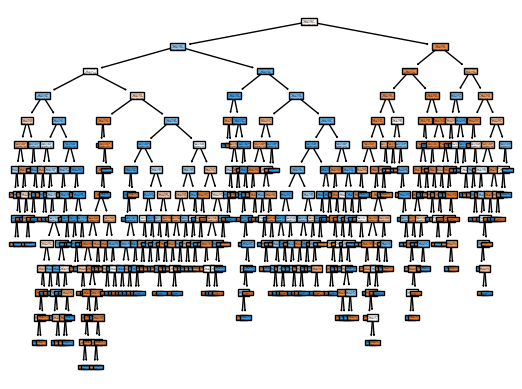

In [35]:
tree.plot_tree(Model.estimators_[1], filled = True)

## Predictions and Results

In [36]:
# Predicting
Predictions = Model.predict(Xtest)
Predictions

array([0., 1., 1., ..., 0., 1., 0.])

In [37]:
# Prediction file (Submission file)
np.savetxt("Data1predictions.csv", Predictions, delimiter=",")

In [38]:
# model accuracy
FP, TP, Threshold = roc_curve(Ytest, Predictions)
roc_auc_score(Ytest, Predictions)

0.9391182717444883

### RoC curve

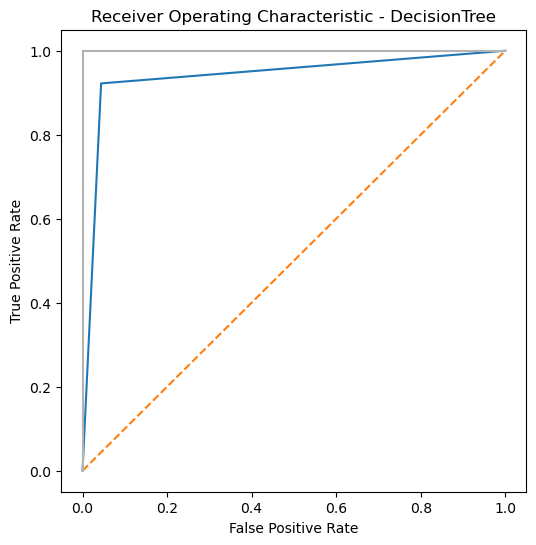

In [39]:
# Ploting RoC curve
plt.subplots(1, figsize=(6,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Confusion Matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


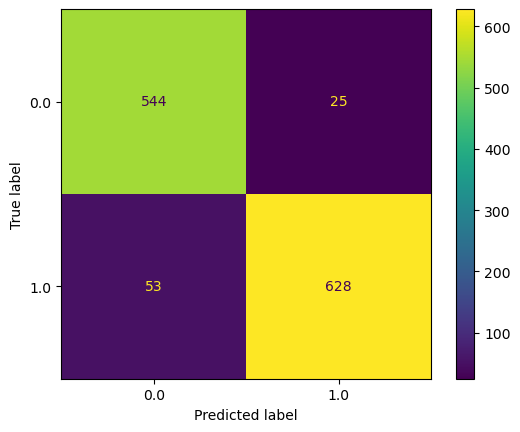

In [41]:
plot_confusion_matrix(Model, Xtest, Ytest)

### Classification Report

In [43]:
print(classification_report(Ytest, Predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       569
         1.0       0.96      0.92      0.94       681

    accuracy                           0.94      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.94      0.94      0.94      1250

